# **Задание 1. Гершбаум С.**
---

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data_main = pd.read_csv('/content/shopping_trends.csv')

df = data_main.copy()
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


В датасете имеются следующие данные:
 - **`Customer ID`** - уникальный идентификатор каждого клиента
 - **`Age`** - возраст клиента
 - **`Gender`** - пол клиента
 - **`Item Purchased`** - товар, приобретенный клиентом
 - **`Category`** - категория приобретенного товара
 - **`Purchase Amount (USD)`** - сумма покупки в долларах США
 - **`Location`** - место совершения покупки
 - **`Size`** - размер приобретенного товара
 - **`Color`** - цвет приобретенного товара
 - **`Season`** - время года, в которое была совершена покупка
 - **`Rewiew Rating`** - оценка, поставленная покупателем приобретенному товару
 - **`Subscription Status`** - наличие подписки у покупателя
 - **`Payment Method`** - тип оплаты товара
 - **`Shipping Type`** - тип доставки товара
 - **`Discount Applied`** - наличие примененной скидки к покупке
 - **`Promo Code Used`** - наличие примененного промокода для покупки
 - **`Previous Purchases`** - количество совершенных покупок клиентом
 - **`Preferred Payment Method`** - предпочитаемый способ оплаты
 - **`Frequency of Purchases`** - частота приобретения новых товаров клиентом

Посмотрим, есть ли в нашем датасете отсутстующие значения и какие типы данных представлены в таблице:

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Null'ы отсутствуют. Вглянем на основные характеристики распределения данных в столбцах с возрастом клиента, ценой товара и его рейтингом:

In [85]:
df.describe().map(lambda x: f"{x:.3f}")[['Age', 'Purchase Amount (USD)', 'Review Rating']]

,Age,Purchase Amount (USD),Review Rating
count,3900.000,3900.000,3900.000
mean,44.068,59.764,3.750
std,15.208,23.685,0.716
min,18.000,20.000,2.500
25%,31.000,39.000,3.100
50%,44.000,60.000,3.700
75%,57.000,81.000,4.400
max,70.000,100.000,5.000


Посмотрим на категориальные признаки:

In [86]:
df.describe(include=['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


Для формулировки гипотез "развернем" некоторые данные. Для начала посмотрим, какие есть категории товаров:

In [87]:
", ".join(df['Category'].unique())

'Clothing, Footwear, Outerwear, Accessories'

Какие товары были приобретены?

In [88]:
", ".join(df['Item Purchased'].unique())

'Blouse, Sweater, Jeans, Sandals, Sneakers, Shirt, Shorts, Coat, Handbag, Shoes, Dress, Skirt, Sunglasses, Pants, Jacket, Hoodie, Jewelry, T-shirt, Scarf, Hat, Socks, Backpack, Belt, Boots, Gloves'

Посмотрим на виды оплаты:

In [89]:
", ".join(df['Payment Method'].unique())

'Credit Card, Bank Transfer, Cash, PayPal, Venmo, Debit Card'

Виды доставки:

In [90]:
", ".join(df['Shipping Type'].unique())

'Express, Free Shipping, Next Day Air, Standard, 2-Day Shipping, Store Pickup'

---
## **Задание 1.1**

Сформулируем некоторые гипотезы и проверим их.

**1.** Как известно, лучшие друзья девушек - это бриллианты. Можно предположить, что самый популярый день для такого рода подарков - 8 марта. Хоть в США это и не является официальным праздником, на примере этой таблицы посмотрим, приходится ли пик продаж ювелирных украшений на весну?

**2.** Положим, что к молодежи относятся люди в возрасте до 30 лет включительно, и данная возрастная группа предпочитает электронный вид оплаты. На нашем датасете проверим, так ли это?

**3.** Выясним, влияет ли наличие скидки или промокода при покупке на оценку приобретеного товара покупателем.

**4.** Предположим, что в определенных штатах спрос на некоторые категории товаров выше, чем на остальные (например, в штатах с более холодным климатом повышеный спрос может быть на куртки, свитера, шарфы или перчатки). Так это или нет, убедимся при исследовании зависимости категории приобретенного товара от места совершения покупки.

**5.** Влияет ли цена товара на его последующую доставку? Может быть более дорогие товары доставляются быстрее остальных?

---
Для проверки **первой гипотезы** отфильтруем данные по `Jewelry` и построим распределение количества покупок ювелирных изделий по временам года:

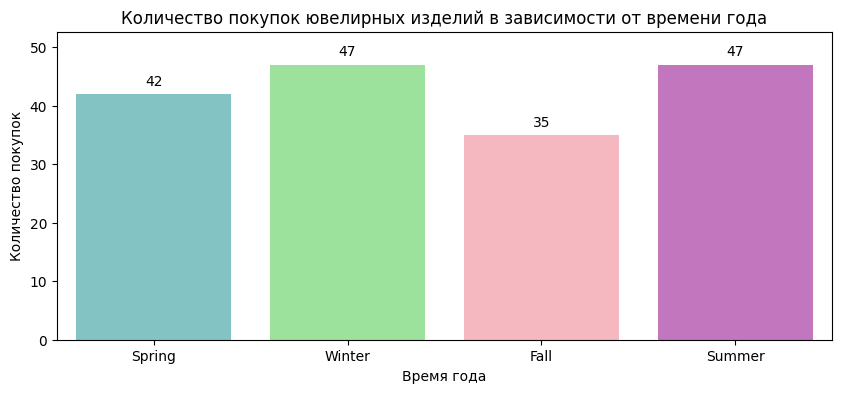

In [91]:
jewelry_data = df[df['Item Purchased'] == 'Jewelry']

colors_for_seasons = ['#79CDCD', '#90EE90', '#FFAEB9', '#CD69C9']
plt.figure(figsize=(10,4))
jewelry_cp = sns.countplot(
    x='Season',
    data=jewelry_data,
    palette=colors_for_seasons,
    hue='Season'
)

# поднимаем верхннюю границу рамки, чтобы на нее не накладывались численные значения
jewelry_cp.set_ylim(0, max([p.get_height() for p in jewelry_cp.patches]) * 1.12)

# настройка положения численных значений для столбцов гистограммы
for p in jewelry_cp.patches:
    jewelry_cp.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 1), ha='center', va='bottom')

plt.title('Количество покупок ювелирных изделий в зависимости от времени года')
plt.xlabel('Время года')
plt.ylabel('Количество покупок')
plt.show()

Увы, первая гипотеза не подтвердилась. Самые популярные времена года - зима и лето, но разница с остальными временами года совсем небольшая. Ради интереса посмотрим, кто покупает украшения чаще: мужчины или женщины?

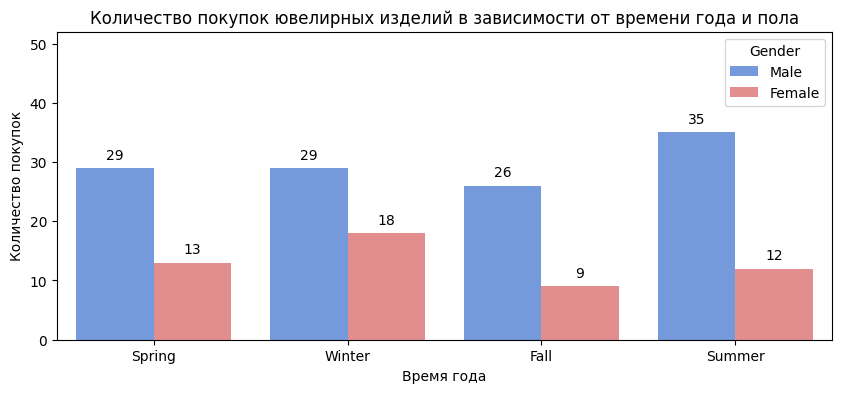

In [92]:
colors_for_gender = ['#6495ED', '#F08080']
plt.figure(figsize=(10,4))
jewelry_cp_by_gender = sns.countplot(
    x='Season',
    data=jewelry_data,
    palette=colors_for_gender,
    hue='Gender'
)

jewelry_cp_by_gender.set_ylim(0, max([p.get_height() for p in jewelry_cp.patches]) + 5)

for p in jewelry_cp_by_gender.patches:
    if p.get_height() > 0:
        jewelry_cp_by_gender.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 1), ha='center', va='bottom')

plt.title('Количество покупок ювелирных изделий в зависимости от времени года и пола')
plt.xlabel('Время года')
plt.ylabel('Количество покупок')
plt.show()

Вот такой результат! Мужчины в данном случае более активные покупатели. Идем дальше.

---
Перейдем к проверке **[второй гипотезы](#Задание-1.1)**. Выделим 2 возрастные категории:
- люди до 30 лет включительно
- люди старше 30 лет

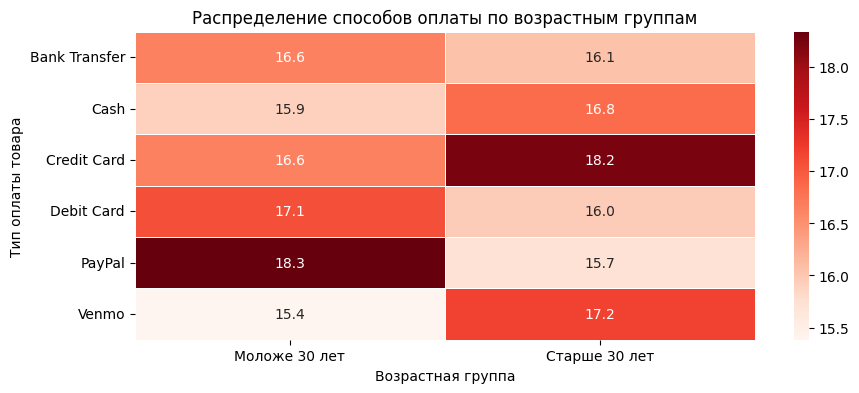

In [93]:
age_group = pd.cut(
    df['Age'],
    bins=[0, 30, df['Age'].max()],
    labels=['Моложе 30 лет', 'Старше 30 лет']
)
df['Age Group'] = age_group

# создадим сводную таблицу и посчитаем все методы оплаты по возрастным группам
payment_by_age_pivot = df.pivot_table(
    index='Payment Method',
    columns='Age Group',
    aggfunc='size',
    observed=False
)

# посчитаем процентное соотношение типов оплаты товаров
payment_by_age_perc = payment_by_age_pivot.div(payment_by_age_pivot.sum(axis=0), axis=1) * 100

# теперь посмотрим наш хитмэп
plt.figure(figsize=(10,4))
sns.heatmap(payment_by_age_perc, annot=True, cmap='Reds', linewidth=0.5, fmt='.1f')
plt.title('Распределение способов оплаты по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Тип оплаты товара')
plt.show()

Если под неэлектронным видом оплаты из возможных понимать только наличные деньги, то он более популярен у людей старше 30 лет - 16.8% против 15.9% у молодежи. По полученным данным нельзя сказать, что какая-либо возрастная группа чаще использует тот или иной способ оплаты - разница в процентных соотношениях совсем небольшая. Но опять же, если электронные виды оплаты это все предложенные, кроме наличных - то такой вид оплаты у молодых людей менее популярен. Если смотреть на каждый по отдельности, самый непопулярный - Venmo (15.4%).

Но у нас есть еще столбец `Preferred Payment Method`. Проделаем те же операции и для него:

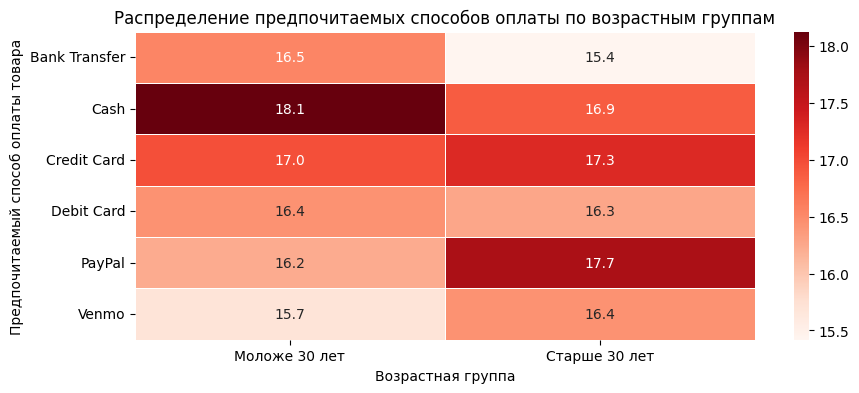

In [94]:
prefer_payment_by_age_pivot = df.pivot_table(
    index='Preferred Payment Method',
    columns='Age Group',
    aggfunc='size',
    observed=False
)
prefer_payment_by_age_perc = prefer_payment_by_age_pivot.div(prefer_payment_by_age_pivot.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10,4))
sns.heatmap(prefer_payment_by_age_perc, annot=True, cmap='Reds', linewidth=0.5, fmt='.1f')
plt.title('Распределение предпочитаемых способов оплаты по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Предпочитаемый способ оплаты товара')
plt.show()

Вот как. Молодежь и вовсе предпочитает наличные (18.1%, с небольшим отрывом), а люди постарше отдают предпочтение PayPal'у - 17.7%. Хоть разброс совсем небольшой, но гипотеза наша провалилась. Интересно узнать, почему между фактическим и предпочитаемым способами оплаты есть разница? Причин может быть много. У клиентов, для которых два этих столбца разнятся, можно рассмотреть следующие столбцы: `Category`, `Purchase Amount (USD)`, `Location`, `Subscription Status`, `Shipping Type`, `Discount Applied`, `Previous Purchases`.

Отфильтруем строки, где фактический и предпочитаемый способы оплаты не сопадают:

In [95]:
payment_mismatch = df[df['Payment Method'] != df['Preferred Payment Method']]

Посмотрим на количество несовпадений "способов оплаты" в зависимости от столбцов, изложенных выше:

In [96]:
payment_mismatch_by_category = payment_mismatch.groupby('Category').size().sort_values(ascending=False).reset_index(name='Payment mismatch count')
payment_mismatch_by_usd = payment_mismatch.groupby('Purchase Amount (USD)').size().sort_values(ascending=False).reset_index(name='Payment mismatch count')
payment_mismatch_by_location = payment_mismatch.groupby('Location').size().sort_values(ascending=False).reset_index(name='Payment mismatch count')
payment_mismatch_by_subs = payment_mismatch.groupby('Subscription Status').size().sort_values(ascending=False).reset_index(name='Payment mismatch count')
payment_mismatch_by_ship = payment_mismatch.groupby('Shipping Type').size().sort_values(ascending=False).reset_index(name='Payment mismatch count')
payment_mismatch_by_disc = payment_mismatch.groupby('Discount Applied').size().sort_values(ascending=False).reset_index(name='Payment mismatch count')
payment_mismatch_by_prevpurch = payment_mismatch.groupby('Previous Purchases').size().sort_values(ascending=False).reset_index(name='Payment mismatch count')

In [97]:
payment_mismatch_by_category

,Category,Payment mismatch count
0,Clothing,1449
1,Accessories,1050
2,Footwear,514
3,Outerwear,270


In [98]:
payment_mismatch_by_usd

,Purchase Amount (USD),Payment mismatch count
0,36,59
1,51,54
2,94,53
3,32,52
4,25,50
...,...,...
76,49,30
77,87,30
78,61,30
79,47,28


In [99]:
payment_mismatch_by_location

,Location,Payment mismatch count
0,California,80
1,Idaho,79
2,Montana,76
3,Maryland,76
4,Illinois,76
5,New York,75
6,Alabama,75
7,Louisiana,72
8,Missouri,72
9,Mississippi,72


In [100]:
payment_mismatch_by_subs

,Subscription Status,Payment mismatch count
0,No,2405
1,Yes,878


In [101]:
payment_mismatch_by_ship

,Shipping Type,Payment mismatch count
0,Free Shipping,562
1,Express,549
2,Next Day Air,547
3,Standard,544
4,Store Pickup,544
5,2-Day Shipping,537


In [102]:
payment_mismatch_by_disc

,Discount Applied,Payment mismatch count
0,No,1873
1,Yes,1410


In [103]:
payment_mismatch_by_prevpurch

,Previous Purchases,Payment mismatch count
0,14,81
1,3,80
2,31,79
3,20,78
4,21,77
5,40,76
6,6,75
7,48,75
8,24,75
9,18,74


Из полученных данных явно можно выделить пару факторов, предположительно влияющих на несоответствие "способов оплаты": категория товаров (`Category`) и наличие подписки у покупателя (`Subscription Status`). Учтем эти два фактора и построим тепловую таблицу:

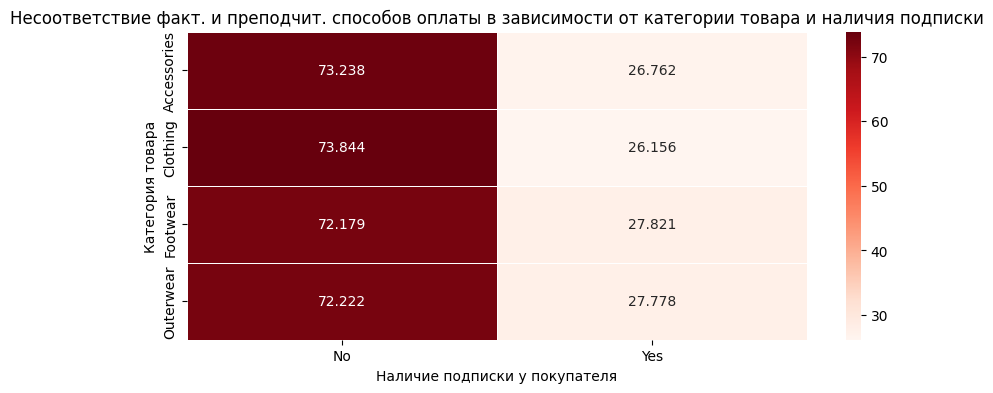

In [104]:
# сводная таблица
payment_mismatch_pivot = payment_mismatch.pivot_table(
    index='Category',
    columns='Subscription Status',
    aggfunc='size'
)

# посчитаем процентное соотношение несовпадений для каждой из категорий
payment_mismatch_perc = payment_mismatch_pivot.div(payment_mismatch_pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,4))
sns.heatmap(payment_mismatch_perc, annot=True, cmap='Reds', linewidth=0.5, fmt='.3f')
plt.title('Несоответствие факт. и преподчит. способов оплаты в зависимости от категории товара и наличия подписки')
plt.xlabel('Наличие подписки у покупателя')
plt.ylabel('Категория товара')
plt.show()

Можно сделать вывод, что от категории товаров выявленные несоответствия не зависят, а вот от наличия подписки зависят - для каждой из категории товаров в среднем 73% покупателей оплачивают заказ непредпочитаемым способом, если у них нет подписки. Вероятно, подписка расширяет выбор типов оплаты товара.

---
Рассмотрим нашу **третью гипотезу**: влияет ли наличие скидки или промокода при покупке на оценку приобретеного товара покупателем. Интересно посмотреть, сколько таких покупателей (есть промокод или применена скидка) в процентном соотношении.

In [105]:
(df['Discount Applied'].value_counts(normalize=True)*100).reset_index()

,Discount Applied,proportion
0,No,57.0
1,Yes,43.0


In [106]:
(df['Promo Code Used'].value_counts(normalize=True)*100).reset_index()

,Promo Code Used,proportion
0,No,57.0
1,Yes,43.0


Процент одинаковый. Проверим, означает ли "наличие скидки" = "наличие промокода" (вдруг скидка может быть не только из-за наличия промокода)?

In [107]:
(df['Discount Applied'] == df['Promo Code Used']).all()

True

Столбцы совпадают. Значит, можем работать с любым из них. Построим столбчатую диаграмму, которая покажет зависимость оценки товара покупателем от наличия скидки.

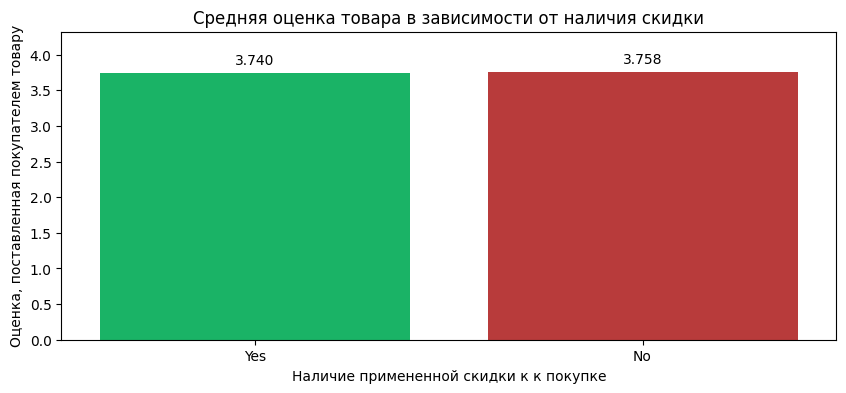

In [108]:
colors_for_disc = ['#00CD66', '#CD2626']
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Discount Applied', y='Review Rating', data=df, estimator='mean', palette=colors_for_disc, errorbar=None, hue='Discount Applied')

ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.08), ha='center', va='bottom')

plt.title('Средняя оценка товара в зависимости от наличия скидки')
plt.xlabel('Наличие примененной скидки к к покупке')
plt.ylabel('Оценка, поставленная покупателем товару')
plt.show()

Вывод: средние оценки товаров не зависят от того, была применена скидка или нет. Значения практически не отличаются, в случае отсутствия скидки средняя оценка на сотую больше.

---
Проверим **[4-ю гипотезу](#Задание-1.1)**. Продублируем список уникальных товаров:

In [109]:
", ".join(df['Item Purchased'].unique())

'Blouse, Sweater, Jeans, Sandals, Sneakers, Shirt, Shorts, Coat, Handbag, Shoes, Dress, Skirt, Sunglasses, Pants, Jacket, Hoodie, Jewelry, T-shirt, Scarf, Hat, Socks, Backpack, Belt, Boots, Gloves'

К товарам, которые более востребованы при холодной погоде, отнесем свитера, куртки, шапки и перчатки (`Sweater`, `Jacket`, `Hat`, `Gloves`). Построим тепловую карту (`Location` - `Item Purchased`) и проанализируем результаты (применим функцию crosstab() для двух столбцов с категориальными признаками).

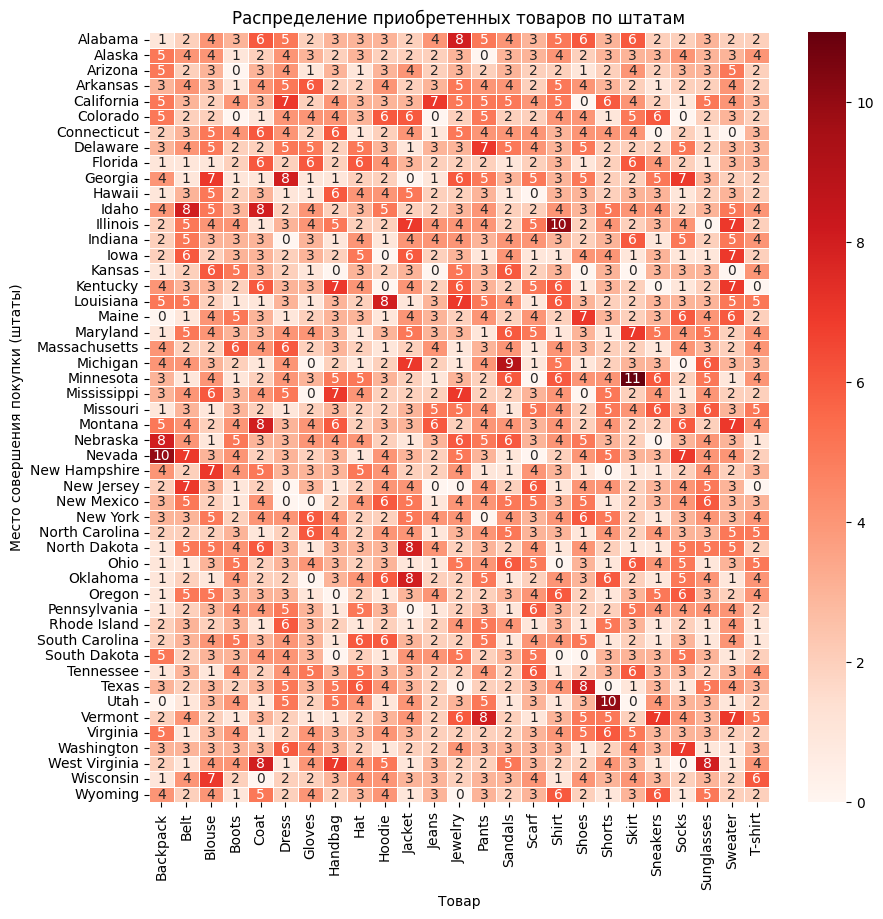

In [110]:
plt.figure(figsize=(10,10))

item_by_location = pd.crosstab(df['Location'], df['Item Purchased'])
sns.heatmap(item_by_location, annot=True, cmap='Reds', linewidths=0.5, fmt='.0f')

plt.title('Распределение приобретенных товаров по штатам')
plt.xlabel('Товар')
plt.ylabel('Место совершения покупки (штаты)')
plt.show()

Мало что можно сказать по этому хитмэпу. Отфильтруем нашу сводную таблицу по интересующим нам товарам и посмотрим, в каких штатах они покупались более 4 раз:

In [111]:
warm_clothes = ['Sweater', 'Jacket', 'Hat', 'Gloves']
warm_clothes_pivot = item_by_location[warm_clothes]
res = {}
for item in warm_clothes:
    res[item] = warm_clothes_pivot[warm_clothes_pivot[item] > 4].index.tolist()

# выведем полученный результат в виде датафрейма
my_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in res.items()]))
my_df

,Sweater,Jacket,Hat,Gloves
0,Arizona,Colorado,Delaware,Arkansas
1,Idaho,Hawaii,Florida,Delaware
2,Illinois,Illinois,Iowa,Florida
3,Indiana,Iowa,Minnesota,New York
4,Iowa,Maryland,New Hampshire,North Carolina
5,Kentucky,Michigan,Pennsylvania,Tennessee
6,Louisiana,New Mexico,South Carolina,NaN
7,Maine,New York,Tennessee,NaN
8,Montana,North Dakota,Texas,NaN
9,North Carolina,Oklahoma,NaN,NaN


Есть ли штаты, в которых покупались все 4 товара?

In [112]:
states_for_all_warm_clothes = [set(my_df[item].dropna()) for item in warm_clothes]
set.intersection(*states_for_all_warm_clothes)

set()

Таких штатов нет. Либо не все из этих четырех товаров можно отнести к теплым вещам, либо предполагаемой тенденции (наша гипотеза) нет. Потому что в одном из самых холодых штатов (Аляске) самый популярный товар - рюкзак. Звучит как разрывной анекдот для якутов.

---
Посмотрим, влияет ли цена товара на его последующую доставку (наша **[5-я гипотеза](#Задание-1.1)**). Продублируем виды доставки:

In [113]:
", ".join(df['Shipping Type'].unique())

'Express, Free Shipping, Next Day Air, Standard, 2-Day Shipping, Store Pickup'

Разделим сумму покупки на 4 категории и построим тепловую карту для наглядности:

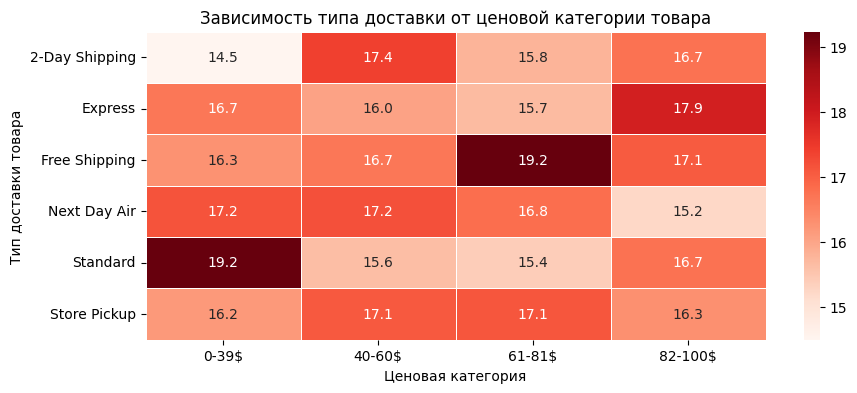

In [114]:
purchase_group = pd.cut(
    df['Purchase Amount (USD)'],
    bins=[0, 39, 60, 81, df['Purchase Amount (USD)'].max()],
    labels=['0-39$', '40-60$', '61-81$', '82-100$']
)
df['Purchase Amount (USD) Group'] = purchase_group

# создадим сводную таблицу и посчитаем все методы оплаты по возрастным группам
ship_purchase_pivot = df.pivot_table(
    index='Shipping Type',
    columns='Purchase Amount (USD) Group',
    aggfunc='size',
    observed=True
)

ship_purchase_perc = ship_purchase_pivot.div(ship_purchase_pivot.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10,4))
sns.heatmap(ship_purchase_perc, annot=True, cmap='Reds', linewidth=0.5, fmt='.1f')
plt.title('Зависимость типа доставки от ценовой категории товара')
plt.xlabel('Ценовая категория')
plt.ylabel('Тип доставки товара')
plt.show()

Из построенного хитмэпа, как минимум, можно сделать вывод, что независимо от цены товара, для него доступен любой тип доставки. Разброс снова совсем небольшой, но для самой низкой ценовой категории лидер - стандартная доставка (19.2% для ценовой категории 0-39 USD), для самой высокой - экспресс-доставка (17.9% для ценовой категории 82-100 USD). Интересно, а может тип доставки зависит от наличия у покупателя подписки?

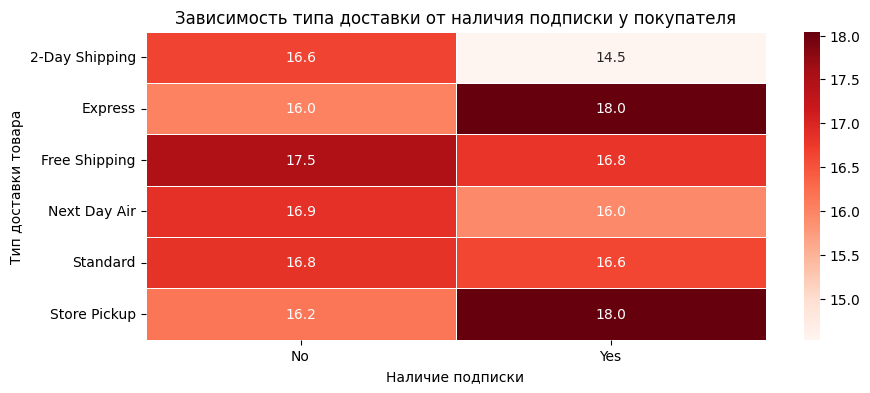

In [115]:
ship_subs_pivot = df.pivot_table(
    index='Shipping Type',
    columns='Subscription Status',
    aggfunc='size',
    observed=True
)

ship_subs_perc = ship_subs_pivot.div(ship_subs_pivot.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10,4))
sns.heatmap(ship_subs_perc, annot=True, cmap='Reds', linewidth=0.5, fmt='.1f')
plt.title('Зависимость типа доставки от наличия подписки у покупателя')
plt.xlabel('Наличие подписки')
plt.ylabel('Тип доставки товара')
plt.show()

Явной зависимости не отслеживается, однако покупателей без подписки, предпочитающих бесплатную доставку (17.5% от общего количества покупателей без подписки) - большинство. Люди, у которых подписка активна, чаще выбирают экспресс-доставку или самовывоз из магазина.

---
## **Задание 1.2**

**1.** Найдем товар, приобретенный наибольшее количество раз:

In [116]:
top_purchased_item = df['Item Purchased'].value_counts().head(5).reset_index()
top_purchased_item.columns = ['Приобретенный товар', 'Количество приобретений']

top_purchased_item

,Приобретенный товар,Количество приобретений
0,Blouse,171
1,Jewelry,171
2,Pants,171
3,Shirt,169
4,Dress,166


Блузка, штаны и ювелирные украшения - самые популярные товары. Их приобретали по 171 разу.

**2.** Построим распределение покупателей по полу. Убедимся, что в датасете 2 возможных варианта:

In [117]:
", ".join(df['Gender'].unique())

'Male, Female'

In [118]:
(df['Gender']).info()

<class 'pandas.core.series.Series'>
RangeIndex: 3900 entries, 0 to 3899
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
3900 non-null   object
dtypes: object(1)
memory usage: 30.6+ KB


Отобразим распределение визуально:

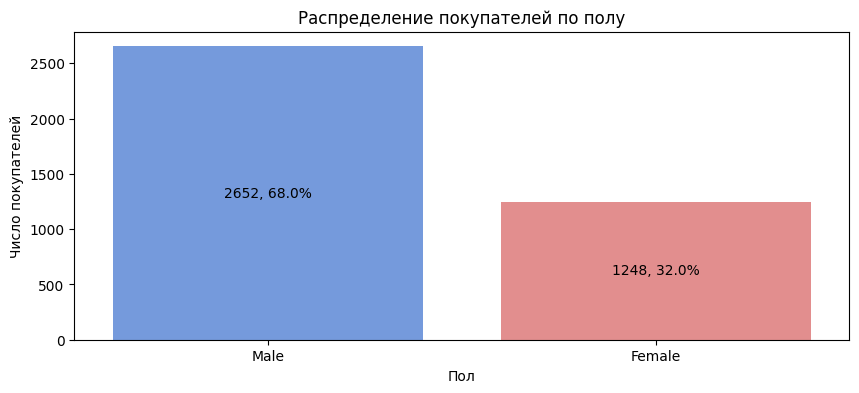

In [119]:
plt.figure(figsize=(10,4))
buyer_by_gender = sns.countplot(
    x='Gender',
    data=df,
    palette=colors_for_gender,
    hue='Gender'
)
#jewelry_cp_by_gender.set_ylim(0, max([p.get_height() for p in jewelry_cp.patches]) * 1.12)

for p in buyer_by_gender.patches:
    buyer_by_gender.text(
        p.get_x() + p.get_width() / 2.,
        p.get_height() / 2.,
        f'{int(p.get_height())}, {p.get_height() / len(df) * 100:.1f}%',
        ha='center',
        va='center'
    )

plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Число покупателей')
plt.show()

Мужчин-покупателей большинство - 68%, женщин - 32% от общего количества покупателей.

**3.** Определим, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Ранее мы выделили несколько ценовых групп, самые дорогие товары отнесем к последней из них. Их стоимость варьируется от 82 долларов до максимальной - 100 долларов. Сгруппируем наш датафрейм по полу и посчитаем суммарную сумму покупок, количество покупок и количество покупок самых дорогих товаров:

In [120]:
buyers_by_gender = df.groupby('Gender').agg(
    total_purchase_amount=('Purchase Amount (USD)', 'sum'),
    total_purchases=('Customer ID', 'count'),
    most_expensive_purchases=('Purchase Amount (USD) Group', lambda x: (x == '82-100$').sum())
).sort_values(by='total_purchases', ascending=False)

# посмотрим, кто чаще покупает дорогие товары: мужчины или женщины
buyers_by_gender['most_expensive_purchases_ratio'] = buyers_by_gender['most_expensive_purchases'] / buyers_by_gender['total_purchases']

buyers_by_gender

,total_purchase_amount,total_purchases,most_expensive_purchases,most_expensive_purchases_ratio
Gender,,,,
Male,157890,2652,625,0.235671
Female,75191,1248,301,0.241186


Видно, что сумма выкупа, количество покупок и покупок дорогих товаров у мужчин больше. Однако девушки покупают дорогие товары чуть чаще, чем мужчины.

Посмотрим на аналогичное распределение по возрасту клиента. Подразделим их на возрастные группы:

In [121]:
age_info = df.describe().map(lambda x: f"{x:.3f}")[['Age']]

age_info

,Age
count,3900.000
mean,44.068
std,15.208
min,18.000
25%,31.000
50%,44.000
75%,57.000
max,70.000


In [122]:
age_group_sec = pd.cut(
    df['Age'],
    bins=[0, 31, 44, 57, 70],
    labels=['18-31 год', '32-44 года', '45-57 лет', '58-70 лет']
)
df['Age Group Sec'] = age_group_sec

buyers_by_age = df.groupby('Age Group Sec', observed=False).agg(
    total_purchase_amount=('Purchase Amount (USD)', 'sum'),
    total_purchases=('Customer ID', 'count'),
    most_expensive_purchases=('Purchase Amount (USD) Group', lambda x: (x == '82-100$').sum())
).sort_values(by='total_purchases', ascending=False)

# посмотрим, какая возрастная группа совершает дорогие покупки чаще
buyers_by_age['most_expensive_purchases_ratio'] = buyers_by_age['most_expensive_purchases'] / buyers_by_age['total_purchases']

buyers_by_age

,total_purchase_amount,total_purchases,most_expensive_purchases,most_expensive_purchases_ratio
Age Group Sec,,,,
18-31 год,62143,1028,248,0.241245
45-57 лет,59197,986,241,0.244422
58-70 лет,55763,944,220,0.233051
32-44 года,55978,942,217,0.230361


Молодые люди в возрасте до 31 года - самые активные покупатели. Дорогие вещи чуточку чаще остальных позволяют себе люди от 45 до 57 лет.

**4.** Есть ли зависимость между цветом одежды и сезоном? Для начала применим `crosstab()` для двух интересующих нас столбцов и посмотрим на хитмэп:

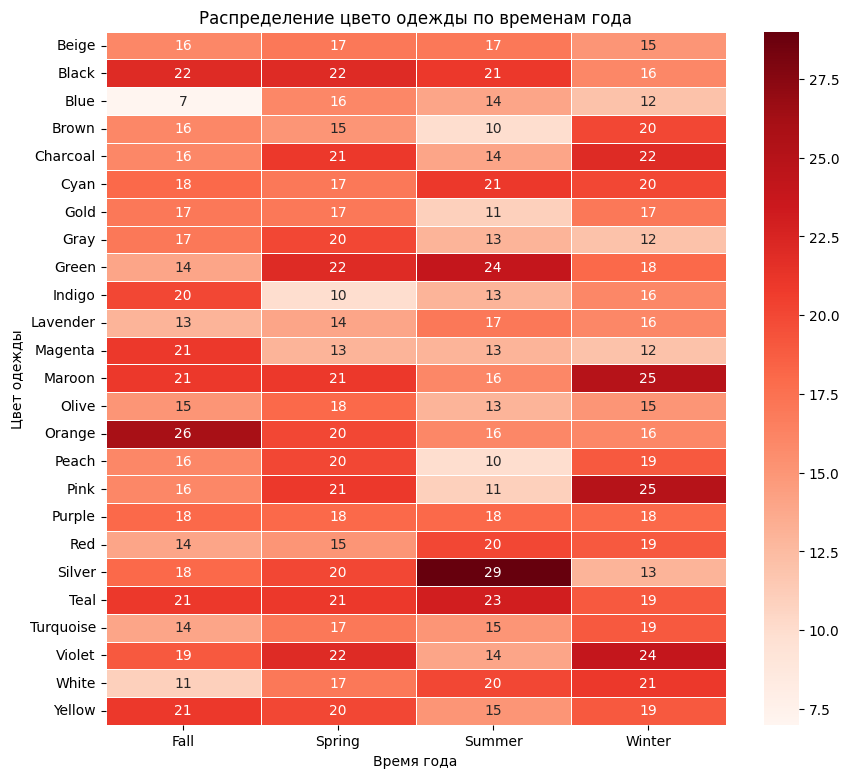

In [123]:
clothing_data = df[df['Category'] == 'Clothing']

color_season_ct= pd.crosstab(clothing_data['Color'], clothing_data['Season'])

plt.figure(figsize=(10,9))
sns.heatmap(color_season_ct, annot=True, cmap='Reds', linewidths=0.5, fmt='.0f')

plt.title('Распределение цвето одежды по временам года')
plt.xlabel('Время года')
plt.ylabel('Цвет одежды')

plt.show()

Явной зависимости не наблюдается. На данном примере построим корреляционую матрицу, используя библиотеку `phik`. С помощью коэффициента корреляции `phi_k` можно установить зависимость между переменными смешанного типа, в нашем случае они категориальные - оба столбца содержат переменые типа `object`.

In [124]:
!pip install phik
import phik

from phik import resources, report
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.6 MB/s eta 0:00:00


In [125]:
cols = ['Color', 'Season']
df[cols].phik_matrix().map(lambda x: f"{x:.3f}")

,Color,Season
Color,1.000,0.000
Season,0.000,1.000


Значения коэффициента равняются 0, что указывает на отсутствие связи между цветом одежды и временем года.

**4.** Посчитаем количество уникальных покупателей за каждый сезон и изучим динамику сезонного MAU. Для этого необходимо сгруппировать наши данные по сезону, отсортировав времена года в логическом порядке:

In [126]:
# группируем по времени года и подсчитываем число уникалных пользователей в каждом сезоне
mau = df.groupby('Season')['Customer ID'].nunique()

# отсортируем по времени года в логическом порядке, начиная с зимы
mau.sort_index(
    key=lambda x: x.map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}),
    inplace=True
)

# столбец 'Customer ID' переименуем на 'MAU'
seasonal_mau = mau.reset_index(name='MAU')

seasonal_mau

,Season,MAU
0,Winter,971
1,Spring,999
2,Summer,955
3,Fall,975


Изобразим графически динамику MAU.

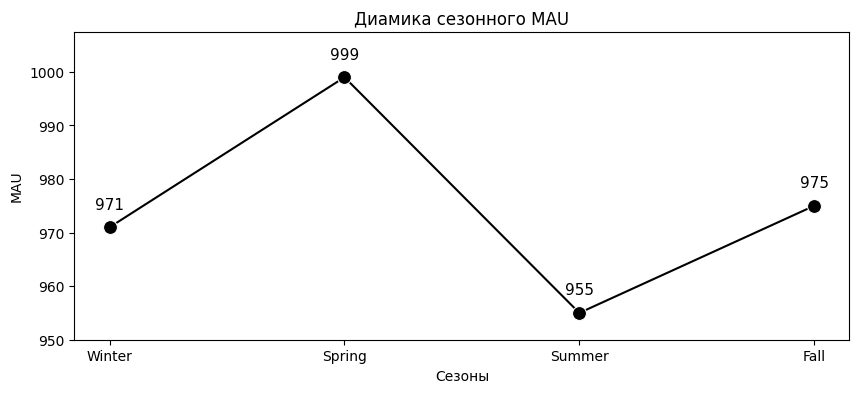

In [127]:
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=seasonal_mau,
    x='Season',
    y='MAU',
    marker='o',
    color='Black',
    markersize=10
)

# добавим числовые значения MAU для каждого времени года
for i in range(len(seasonal_mau)):
    plt.text(
        i, seasonal_mau['MAU'][i] + 3.4, str(seasonal_mau['MAU'][i]), ha='center', fontsize=11
        )

plt.ylim(seasonal_mau['MAU'].min() - 5, seasonal_mau['MAU'].max() + 8.5)

plt.title('Диамика сезонного MAU')
plt.xlabel('Сезоны')
plt.ylabel('MAU')
plt.show()

Самый высокий показатель - весной, 999. Летом он достигает минимума (955).

**5.** Найдем самую популярную букву в названии одежды. Ранее мы получили датафрейм `clothing_data`, в котором из категорий товаров присутствует только одежда.

In [128]:
clothing_data = df[df['Category'] == 'Clothing']
for_letters = clothing_data['Item Purchased'].unique()

for_letters

array(['Blouse', 'Sweater', 'Jeans', 'Shirt', 'Shorts', 'Dress', 'Skirt',
       'Pants', 'Hoodie', 'T-shirt', 'Socks'], dtype=object)

In [129]:
all_letters = ''.join(for_letters).replace('-', '').lower()

all_letters

'blousesweaterjeansshirtshortsdressskirtpantshoodietshirtsocks'

In [130]:
f"Буква {max(set(all_letters), key=all_letters.count)} - самая популярная."

'Буква s - самая популярная.'